# Khalimatus Sakdiyah_06211640007002

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('data latihan.xlsx',sheet=1)

In [3]:
data.shape

(300, 15)

In [5]:
data.head(n=4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [6]:
data.tail(n=4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
296,77,Self-emp-not-inc,138714,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
297,22,Private,399087,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Other-relative,White,Female,0,0,40,Mexico,<=50K
298,29,Private,423158,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
299,62,Private,159841,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,0,0,24,United-States,<=50K


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         300 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        300 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    300 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


In [8]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,38.086667,193268.140000,10.213333,724.403333,103.700000,40.293333
std,13.405403,114198.739612,2.686736,3086.745571,427.589084,11.771257
min,17.000000,21174.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,116935.750000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,183545.500000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,245594.750000,13.000000,0.000000,0.000000,42.000000
max,90.000000,860348.000000,16.000000,34095.000000,2206.000000,98.000000


In [9]:
data = data.replace(' ?', np.nan)

In [10]:
data.isnull().sum()

age                0
workclass         16
fnlwgt             0
education          0
education-num      0
marital-status     0
occupation        16
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     7
type               0
dtype: int64

In [11]:
data.isnull().sum().sum()

39

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         284 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        284 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    293 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


In [13]:
Y = ['type']
X_int = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week']
X_cat = ['workclass', 'education', 'marital-status', 'occupation', 'relationship','race','sex','native-country']

In [14]:
data_Y = data[Y]
data_int = data[X_int].astype(float)
data_cat = data[X_cat]

In [15]:
print(data_Y['type'].unique())

[' <=50K' ' >50K']


In [16]:
data_int_array = []
data_cat_array = []
for class_name in data_Y['type'].unique():
    data_int_1 = data_int[data_Y['type']==class_name]
    data_int_clean_1 = data_int_1.fillna(data_int_1.mean().astype(int))
    data_int_array.append(data_int_clean_1)
    
   
    data_cat_1 = data_cat[data_Y['type']==class_name]
    data_cat_clean_1 = data_cat_1.where(pd.notnull(data_cat_1), data_cat_1.mode(), axis='columns')
    data_cat_array.append(data_cat_clean_1)

In [17]:
data_int_clean = pd.concat(data_int_array)
data_cat_clean = pd.concat(data_cat_array)

In [18]:
data_int_clean.isnull().sum().sum()
data_cat_clean.isnull().sum().sum()

0

In [19]:
data_baru = pd.concat([data_int_clean,data_cat_clean,data_Y], axis=1)

In [20]:
from sklearn.preprocessing import StandardScaler 

In [21]:
data_baru['fnlwgt'] = StandardScaler().fit(data[['fnlwgt']]).transform(data[['fnlwgt']])
data_baru['education-num'] = StandardScaler().fit(data[['education-num']]).transform(data[['education-num']])
data_baru['capital-gain'] = StandardScaler().fit(data[['capital-gain']]).transform(data[['capital-gain']])
data_baru['capital-loss'] = StandardScaler().fit(data[['capital-loss']]).transform(data[['capital-loss']])
data_baru['hours-per-week'] = StandardScaler().fit(data[['hours-per-week']]).transform(data[['hours-per-week']])

C:\Users\Windows\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Windows\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\Windows\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Windows\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
C:\Users\Windows\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  r

In [22]:
data_baru.head(n=4)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,type
0,39.0,-1.015296,1.038927,0.470404,-0.242928,-0.024961,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50.0,-0.964467,1.038927,-0.235074,-0.242928,-2.322516,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38.0,0.196283,-0.452356,-0.235074,-0.242928,-0.024961,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53.0,0.363595,-1.197997,-0.235074,-0.242928,-0.024961,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K


### deteksi outlier

In [28]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)

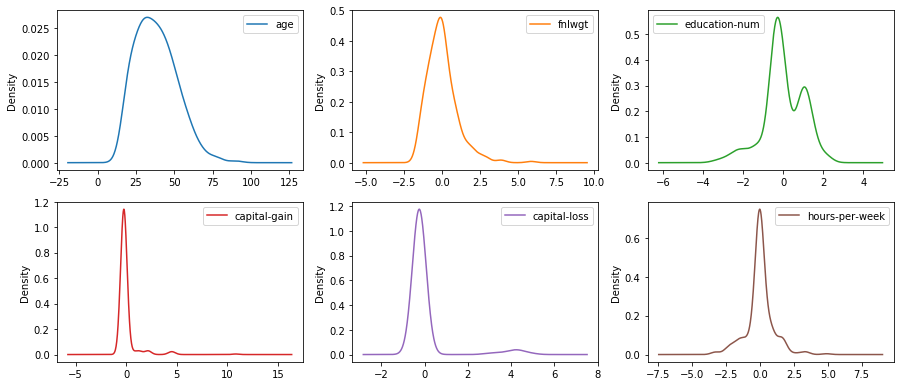

In [29]:
# Univariate Density Plots
data_baru.plot(kind= 'density ' , subplots=True, layout=(3,3), sharex=False)
plt.show()

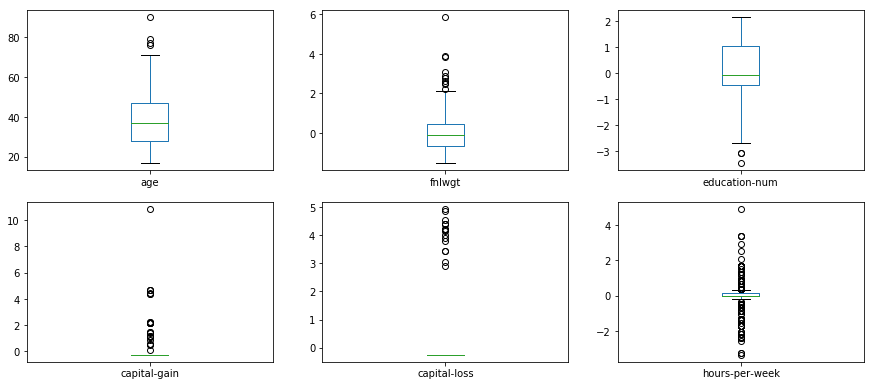

In [30]:
data_baru.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [31]:
colors_palette = {" <=50K": "blue",  " >50K" : "red"}
colors = [colors_palette[c] for c in data_baru['type']] 

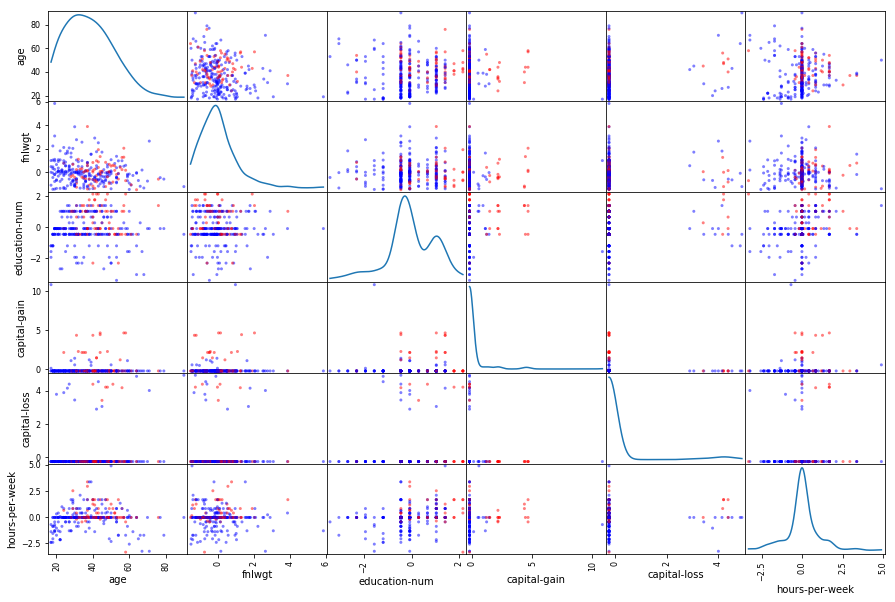

In [32]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_baru, color=colors, diagonal='kde')
plt.show()

In [36]:
data_baru.to_excel('data_tugas4_baru.xlsx', index=0)